# Provo a ritagliare i file scaricati tramite ftp

provo a replicare:
https://help.marine.copernicus.eu/en/articles/6135460-how-to-configure-a-simple-opendap-access-directly-in-python


In [1]:
# import libraries for working with .nc
import xarray as xr
import os   





In [2]:
# path of une month of data

path = 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2003/06'

# list of files in the folder with full path
files = [os.path.join(path, f) for f in os.listdir(path)]
files

['F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2003/06\\20030601_cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1D.nc',
 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2003/06\\20030602_cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1D.nc',
 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2003/06\\20030603_cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1D.nc',
 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2003/06\\20030604_cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1D.nc',
 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2003/06\\20030605_cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1D.nc',
 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2003/06\\20030606_cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1D.nc',
 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2003/06\\20030607_cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1D.nc',
 'F:/CMEMS/cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M/2

In [3]:
# use xarray to stack all files in files
ds = xr.open_mfdataset(files, combine='by_coords')


In [4]:
ds

<xarray.Dataset>
Dimensions:     (time: 30, latitude: 2400, longitude: 34560)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-01 2003-06-02 ... 2003-06-30
  * latitude    (latitude) float64 89.99 89.98 89.97 89.96 ... 65.03 65.02 65.01
  * longitude   (longitude) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    CHL         (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    MICRO       (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    MICRO_BIAS  (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    MICRO_RMSE  (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    NANO        (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    NANO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    NANO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    PICO        (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    PICO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
    PICO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(1, 2400, 34560), meta=np.ndarray>
Attributes: (12/39)
    contact:                 email: cmems@pml.ac.uk
    Naming_authority:        CMEMS
    start_time:              00:00:00 UTC
    stop_time:               23:59:00 UTC
    Conventions:             CF-1.7
    Metadata_Conventions:    Unidata Dataset Discovery v1.0
    ...                      ...
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M
    parameter_code:          MICRO_BIAS NANO_BIAS PICO_BIAS MICRO_RMSE NANO_R...
    parameter:               Chlorophyll-a concentration in sea water using t...
    site_name:               ARC
    creation_date:           2022-10-27
    Creation_time:           10:22:09 UTC

In [9]:
latmin = 72.0
latmax = 85.0
lonmin = -5
lonmax = 50

# subset with latitudes 
ds_subset = ds.sel(latitude=slice(latmax, latmin), longitude=slice(lonmin, lonmax))

ds_subset

<xarray.Dataset>
Dimensions:     (time: 30, latitude: 1248, longitude: 5280)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-01 2003-06-02 ... 2003-06-30
  * latitude    (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude   (longitude) float64 -4.995 -4.984 -4.974 ... 49.97 49.98 49.99
Data variables:
    CHL         (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    MICRO       (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    MICRO_BIAS  (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    MICRO_RMSE  (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    NANO        (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    NANO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    NANO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    PICO        (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    PICO_BIAS   (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
    PICO_RMSE   (time, latitude, longitude) float32 dask.array<chunksize=(1, 1248, 5280), meta=np.ndarray>
Attributes: (12/39)
    contact:                 email: cmems@pml.ac.uk
    Naming_authority:        CMEMS
    start_time:              00:00:00 UTC
    stop_time:               23:59:00 UTC
    Conventions:             CF-1.7
    Metadata_Conventions:    Unidata Dataset Discovery v1.0
    ...                      ...
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-multi-1km_P1M
    parameter_code:          MICRO_BIAS NANO_BIAS PICO_BIAS MICRO_RMSE NANO_R...
    parameter:               Chlorophyll-a concentration in sea water using t...
    site_name:               ARC
    creation_date:           2022-10-27
    Creation_time:           10:22:09 UTC

In [10]:
# map all CHL values
ds_subset['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=0.5, size=3, aspect=1.5)


In [23]:
# in data/monthly_from_daily folder save the subsetted data
outpath = 'F:/Dropbox/Dropbox/R_projects/SV_phenology/data/monthly_from_daily/'

# set consistent _FillValue and missing_value attributes for the 'CHL' variable
encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}


# save the subset to a NetCDF file with the updated encoding
ds_subset.to_netcdf(outpath + '/2003_06.nc', encoding=encoding)

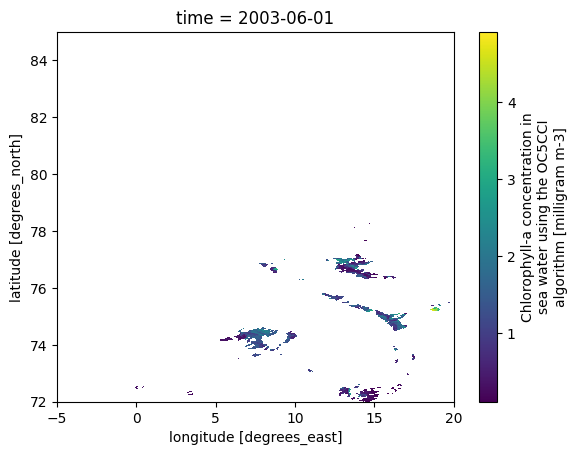

In [25]:
# map the daily data of the subset
ds_subset.isel(time=0).plot()


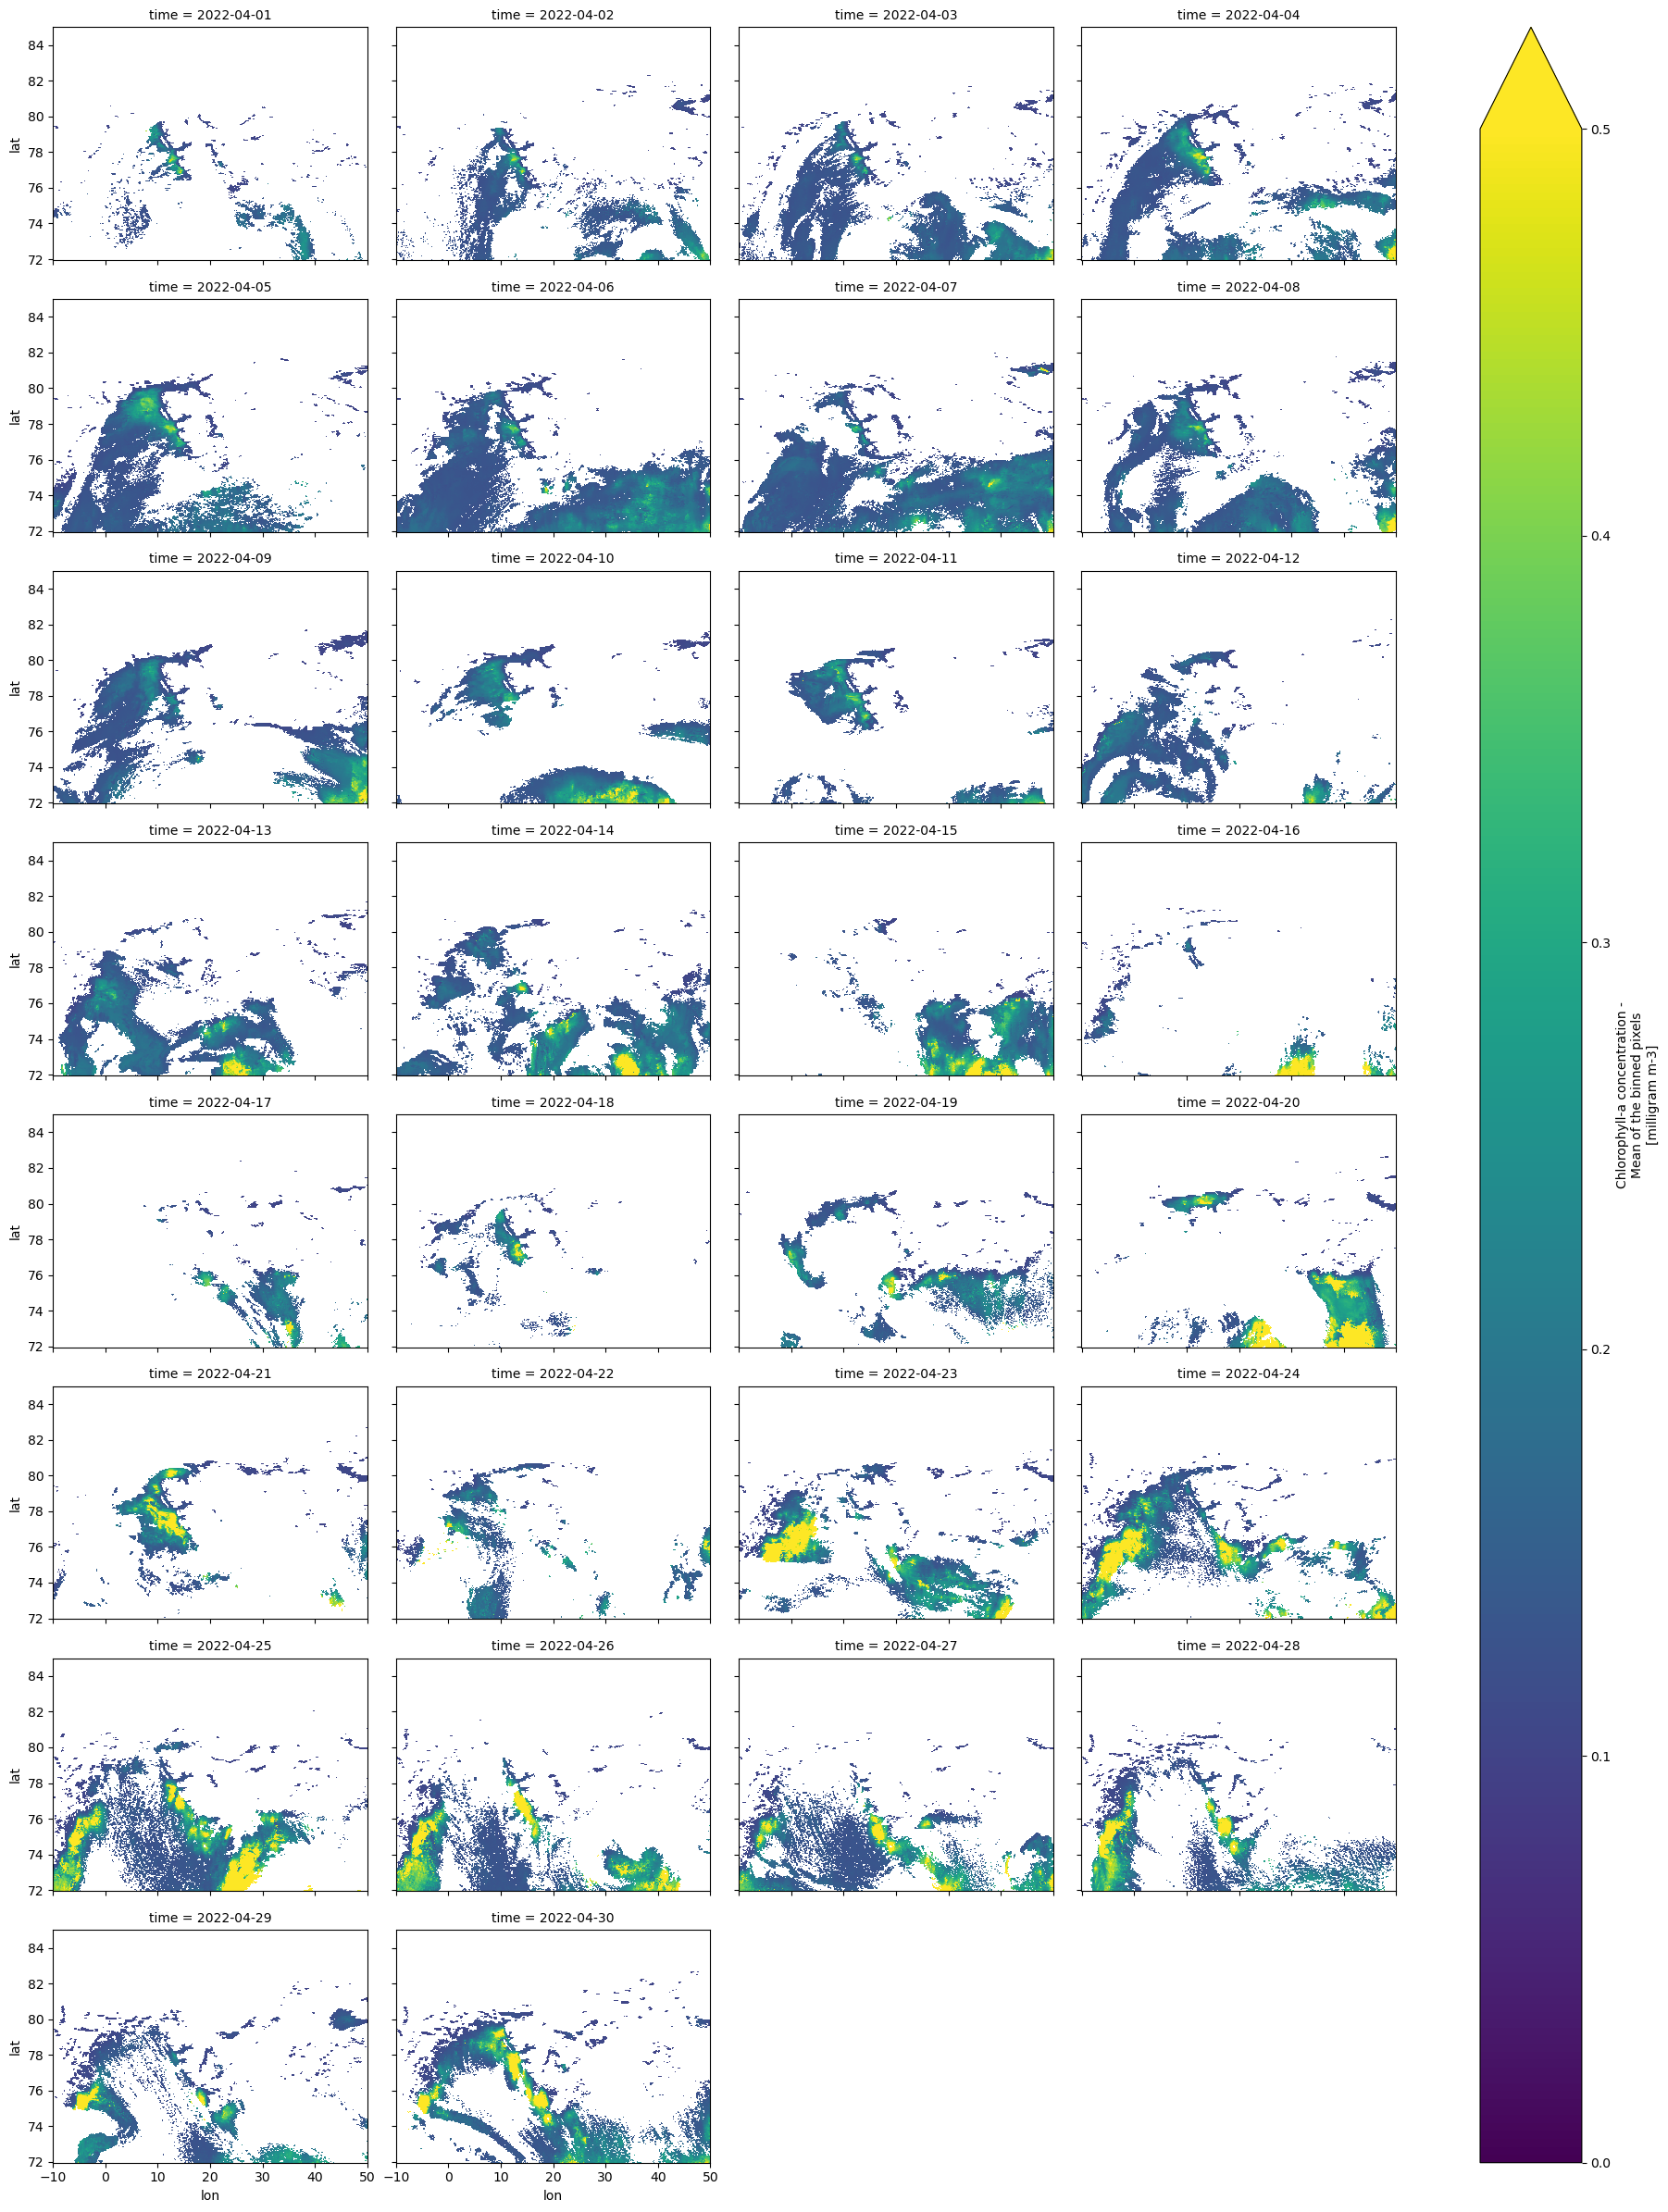

In [16]:
# map CHL for all dates (time)
ds['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=0.5, size=3, aspect=1.5)

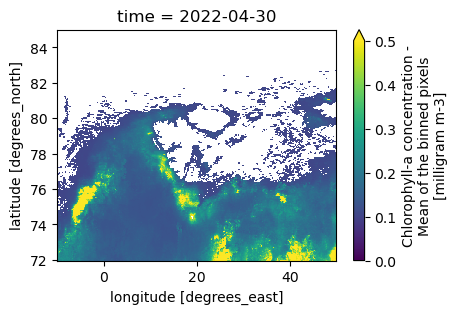

In [22]:
# compute the monthly mean (ignoring NaNs)
ds_monthly = ds.resample(time='1M').mean(dim='time', skipna=True)

# map ds_monthly (one map)
ds_monthly['CHL'].plot(cmap='viridis', vmin=0, vmax=0.5, size=3, aspect=1.5)

# test of dineof

In [37]:
import eofs

In [26]:
type(ds)


xarray.core.dataset.Dataset

Calculate the cosine latitude weights:


In [64]:
coslat_weights = np.sqrt(np.cos(np.radians(ds2['lat'])))


Create an EOF solver object:


In [65]:
reshaped_weights = coslat_weights.values.reshape((1, coslat_weights.size, 1))
reshaped_weights


array([[[0.29583442],
        [0.29705617],
        [0.29827282],
        [0.29948467],
        [0.30069137],
        [0.30189314],
        [0.30309027],
        [0.3042824 ],
        [0.30546984],
        [0.30665275],
        [0.30783087],
        [0.3090044 ],
        [0.3101738 ],
        [0.31133834],
        [0.31249845],
        [0.3136544 ],
        [0.31480584],
        [0.31595296],
        [0.31709605],
        [0.3182348 ],
        [0.31936938],
        [0.32050002],
        [0.32162645],
        [0.32274884],
        [0.32386747],
        [0.32498196],
        [0.32609254],
        [0.32719946],
        [0.32830238],
        [0.32940155],
        [0.33049712],
        [0.33158883],
        [0.33267686],
        [0.3337614 ],
        [0.3348422 ],
        [0.33591944],
        [0.3369933 ],
        [0.3380635 ],
        [0.33913022],
        [0.34019387],
        [0.34125376],
        [0.34231028],
        [0.3433636 ],
        [0.3444135 ],
        [0.3454601 ],
        [0

In [67]:
ds2['CHL'].count()

<xarray.DataArray 'CHL' ()>
array(2097713)

In [68]:
solver = eofs.standard.Eof(ds2['CHL'].values, weights=reshaped_weights)

ValueError: all input data is missing

non riesco da provare in un altro momento